In [ ]:
!pip install efficientnet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.7 MB/s 


In [ ]:
import os
import cv2
import time
import glob
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import efficientnet.tfkeras as efn

from collections import Counter
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


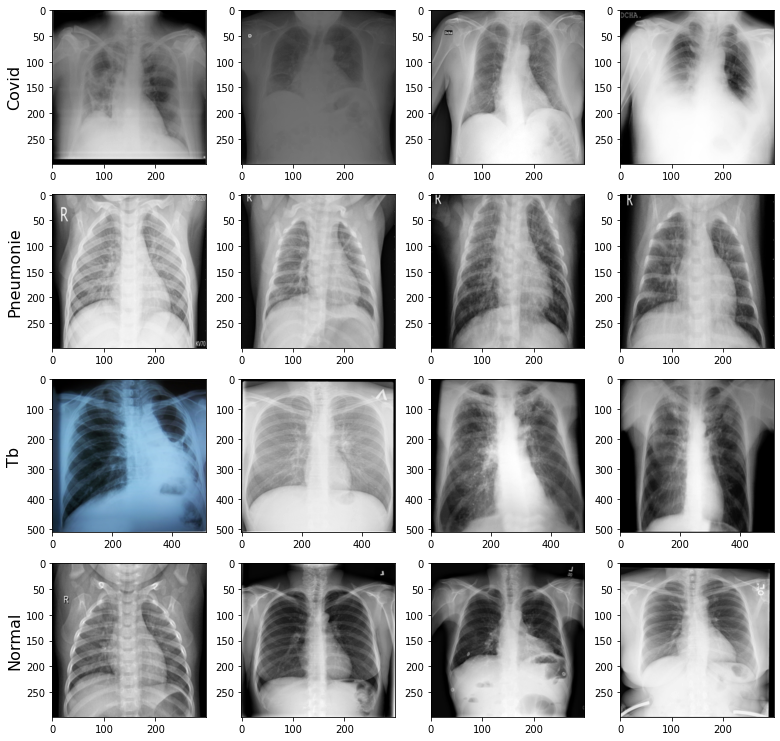

In [ ]:
#Affichage de quelques images pour chaque classe
train_path = r'/content/drive/MyDrive/lungs_data/cptn_dataset/Train/'

test_path = r'/content/drive/MyDrive/lungs_data/cptn_dataset/Test/'

classes = ['Covid', 'Pneumonie', 'Tb', 'Normal']


Covid_examples = glob.glob(train_path + 'Covid/*')
Pneu_examples = glob.glob(train_path + 'Pneumonie/*')
Tb_examples = glob.glob(train_path + 'Tb/*')
Normal_examples = glob.glob(train_path + 'Normal/*')
examples = Covid_examples[:4] + Pneu_examples[:4] + Tb_examples[:4] + Normal_examples[:4]

fig=plt.figure(figsize=(13, 13))
columns = 4
rows = 4
for i in range(columns*rows):
    img = plt.imread(examples[i])
    ax = fig.add_subplot(rows, columns, i+1)
    if i%4==0:
        plt.ylabel(classes[int(i/4)], fontsize=16)
    plt.imshow(img, cmap='gray')
plt.show()

5695


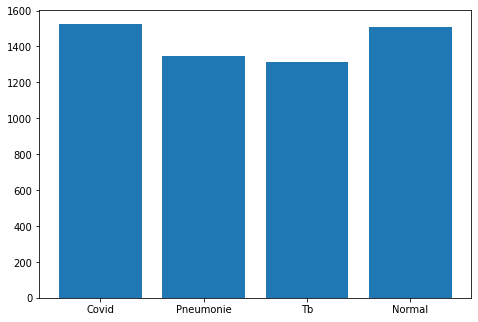

In [ ]:
#Affichage du nombre d'images par classe
total_covid_samples = len(glob.glob(train_path + 'Covid/*'))
total_pneu_samples = len(glob.glob(train_path + 'Pneumonie/*'))
total_tb_samples = len(glob.glob(train_path + 'Tb/*'))
total_normal_samples = len(glob.glob(train_path + 'Normal/*'))

sample_distribution = [total_covid_samples, total_pneu_samples, total_tb_samples, total_normal_samples]
print(np.sum(sample_distribution))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(classes, sample_distribution)
plt.show()


In [ ]:
#spécification de quelques paramètres 
nh = nw = 150
n_classes = 4
image_size = 150

batch_size = 32


learning_rate = 0.001


In [ ]:
#Acquisition des images
train_datagen = ImageDataGenerator(rescale=1./255 ,rotation_range=45,width_shift_range=0.2,
                                   height_shift_range=0.2,horizontal_flip=True, vertical_flip=True,
                                   shear_range=0.2,zoom_range=0.2,fill_mode='reflect', validation_split=0.2)
train_data = train_datagen.flow_from_directory(train_path,
                                               target_size=(nh, nw),
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                               shuffle=True
                                              )
validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/lungs_data/cptn_dataset/Train/',target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') 


test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/lungs_data/cptn_dataset/Test/",target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

counter = Counter(train_data.classes)                          
max_val = float(max(counter.values()))  
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}                     
print(class_weights)

Found 5695 images belonging to 4 classes.
Found 1138 images belonging to 4 classes.
Found 2120 images belonging to 4 classes.
{0: 1.0, 1: 1.0146082337317397, 2: 1.1360594795539034, 3: 1.1610942249240122}


In [ ]:
#Augmentation des images
i = 0
for batch in datagen.flow_from_directory(directory='/content/drive/MyDrive/lungs_data/cptn_dataset/Train/Tb', 
                                         batch_size=32,  
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         save_to_dir='/Users/mac/Downloads/ddatta/Images/cptn_dataset/augmented', 
                                         save_prefix='aug', 
                                         save_format='png'):
    i += 1
    if i > 31:
        break 

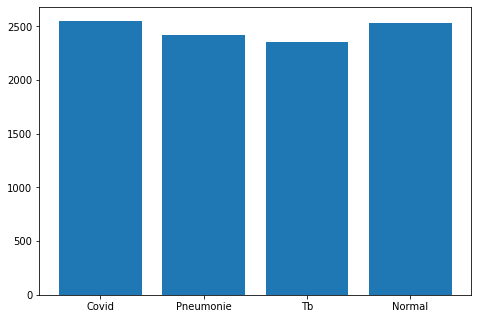

In [ ]:
#Visualisation du nombre des images par classe
train_path_2 = r'/content/drive/MyDrive/lungs_data/Train/'
total_covid_samples = len(glob.glob(train_path_2 + 'Covid/*'))
total_pneu_samples = len(glob.glob(train_path_2 + 'Pneumonie/*'))
total_tb_samples = len(glob.glob(train_path_2 + 'Tb/*'))
total_normal_samples = len(glob.glob(train_path_2 + 'Normal/*'))

sample_distribution = [total_covid_samples, total_pneu_samples, total_tb_samples, total_normal_samples]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(classes, sample_distribution)
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255 ,rotation_range=45,width_shift_range=0.2,
                                   height_shift_range=0.2,horizontal_flip=True, vertical_flip=True,
                                   shear_range=0.2,zoom_range=0.2,fill_mode='reflect', validation_split=0.2)
train_data = train_datagen.flow_from_directory(train_path_2,
                                               target_size=(nh, nw),
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                               shuffle=True
                                              )
validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/lungs_data/Train/',target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') 

Found 9847 images belonging to 4 classes.
Found 1969 images belonging to 4 classes.


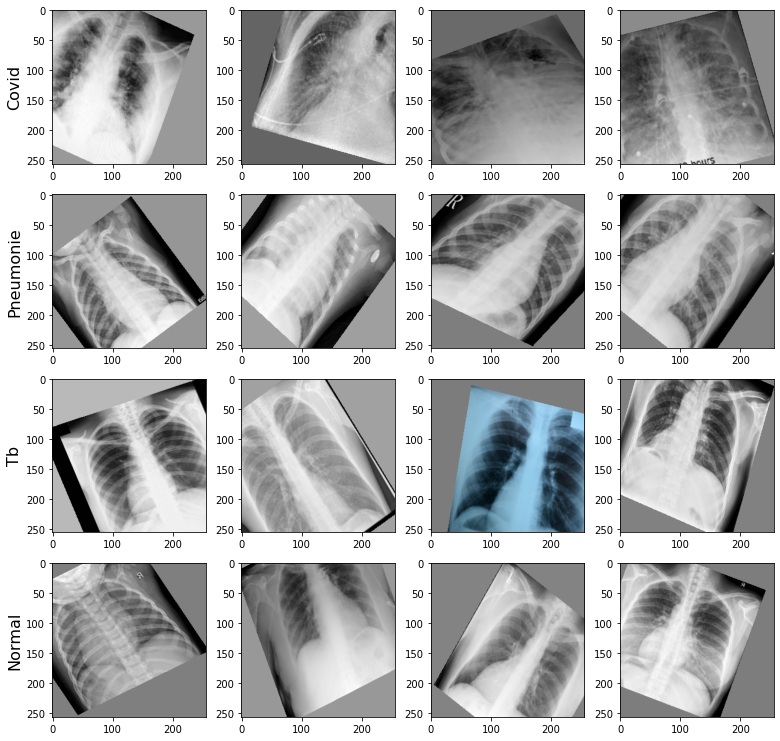

In [ ]:
#Voir les images aumentées
classes = ['Covid', 'Pneumonie', 'Tb', 'Normal']


Covid_examples = glob.glob(train_path_2 + 'Covid/*')
Pneu_examples = glob.glob(train_path_2 + 'Pneumonie/*')
Tb_examples = glob.glob(train_path_2 + 'Tb/*')
Normal_examples = glob.glob(train_path_2 + 'Normal/*')
examples = Covid_examples[:4] + Pneu_examples[:4] + Tb_examples[:4] + Normal_examples[:4]

fig=plt.figure(figsize=(13, 13))
columns = 4
rows = 4
for i in range(columns*rows):
    img = plt.imread(examples[i])
    ax = fig.add_subplot(rows, columns, i+1)
    if i%4==0:
        plt.ylabel(classes[int(i/4)], fontsize=16)
    plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
valid_X, valid_Y = next(validation_generator)
test_X, test_Y = next(test_generator)

In [ ]:
#Définition du model efficientnet
def model_efn():
    input_shape = (150, 150, 3)
    classes = 4
    
    model = efn.EfficientNetB7(weights='imagenet', input_shape=input_shape, pooling='max', include_top=False)
    x = model.output
    output = Dense(classes, activation='softmax')(x)

    return Model(inputs=model.input, outputs=output)

In [ ]:
#Compilation du model
model = model_efn()
model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc']
             )

258449408/258434480 [==============================] - 15s 0us/step


In [ ]:
#Entrainement du model
history = model.fit_generator(train_data, 
                                  steps_per_epoch=100,
                                  validation_data = (valid_X,valid_Y), 
                                  epochs = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
100/100 [==============================] - 1642s 16s/step - loss: 0.8736 - acc: 0.7787 - val_loss: 1.1175 - val_acc: 0.7500
Epoch 2/10
100/100 [==============================] - 716s 7s/step - loss: 0.3178 - acc: 0.9128 - val_loss: 0.0835 - val_acc: 0.9688
Epoch 3/10
100/100 [==============================] - 300s 3s/step - loss: 0.2068 - acc: 0.9403 - val_loss: 0.3051 - val_acc: 0.8750
Epoch 4/10
100/100 [==============================] - 142s 1s/step - loss: 0.1539 - acc: 0.9516 - val_loss: 0.3675 - val_acc: 0.9062
Epoch 5/10
100/100 [==============================] - 89s 893ms/step - loss: 0.0892 - acc: 0.9716 - val_loss: 0.0375 - val_acc: 1.0000
Epoch 6/10
100/100 [==============================] - 67s 670ms/step - loss: 0.0904 - acc: 0.9684 - val_loss: 0.0432 - val_acc: 0.9688
Epoch 7/10
100/100 [==============================] - 65s 653ms/step - loss: 0.0769 - acc: 0.9756 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 8/10
100/100 [==============================] - 63s 632

In [ ]:
model.save("/content/drive/MyDrive/EfficientNett.hdf5")

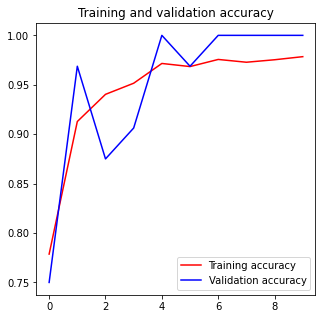

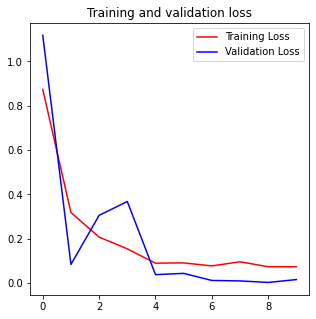

In [ ]:
#historique de l'entrainement
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(5,5))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize = (5,5))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Exactitude pour les données de test
score = model.evaluate_generator(test_generator,steps = test_generator.samples // 100) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.





Test Loss: 0.026095140725374222
Test accuracy: 0.9910714030265808


In [ ]:

pred_datagen = ImageDataGenerator(rescale = 1./255)

pred_generator = pred_datagen.flow_from_directory('/content/drive/MyDrive/lungs_data/cptn_dataset/Test/',target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)  

Found 2120 images belonging to 4 classes.


In [ ]:
pred_generator.reset()
y_pred = model.predict_generator(pred_generator)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
#fonction de la matrice de confusion
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

--------------------
| Confusion Matrix |
--------------------

 [[565   7   0   4]
 [  2 571   9   0]
 [  0   0 602   0]
 [  0   0   0 360]]


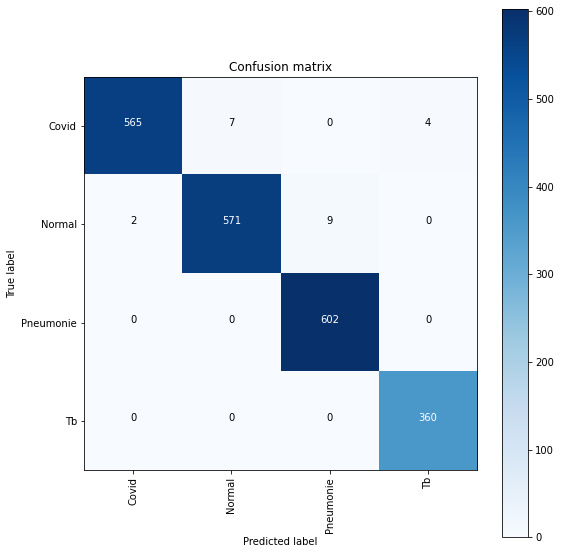

In [ ]:
#Matrice de confusion
import itertools
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['Covid','Normal','Pneumonie','Tb'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()